Problem statement : Predict chances of stroke from given parametres.

In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib as mlp
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [3]:
# making data frame
df = pd.read_csv("C:/Users/Com/Downloads/Compressed/healthcare-dataset-stroke-data.csv")

In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
# dropping non useful feature
df.drop('id',axis=1,inplace=True)

In [6]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
# checking for null data
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# Column wise data distribution 
print (f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')
print (f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')
print (f'{round(df["gender"].value_counts(normalize=True)*100,2)}')
print (f'{round(df["ever_married"].value_counts(normalize=True)*100,2)}')
print (f'{round(df["Residence_type"].value_counts(normalize=True)*100,2)}')
print (f'{round(df["stroke"].value_counts(normalize=True)*100,2)}')

0    90.25
1     9.75
Name: hypertension, dtype: float64
0    94.6
1     5.4
Name: heart_disease, dtype: float64
Female    58.59
Male      41.39
Other      0.02
Name: gender, dtype: float64
Yes    65.62
No     34.38
Name: ever_married, dtype: float64
Urban    50.8
Rural    49.2
Name: Residence_type, dtype: float64
0    95.13
1     4.87
Name: stroke, dtype: float64


In [10]:
#le.inverse_transform(df.gender.unique())

In [11]:
# checking gender wise data distribution
print('Female:',df[df['gender']=='Female'].shape[0])
print('Male:',df[df['gender']=='Male'].shape[0])
print('Other:',df[df['gender']=='Other'].shape[0])

Female: 2994
Male: 2115
Other: 1


<AxesSubplot:xlabel='gender', ylabel='count'>

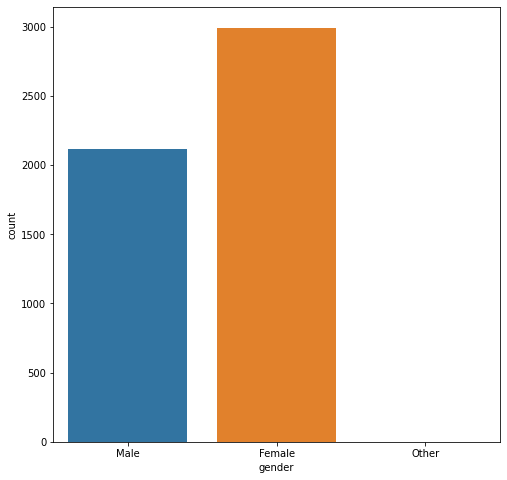

In [12]:
# Plotting gender wise data distribution
mlp.pyplot.figure(figsize=(8,8))
sns.countplot(data=df,x='gender')

<AxesSubplot:xlabel='stroke', ylabel='count'>

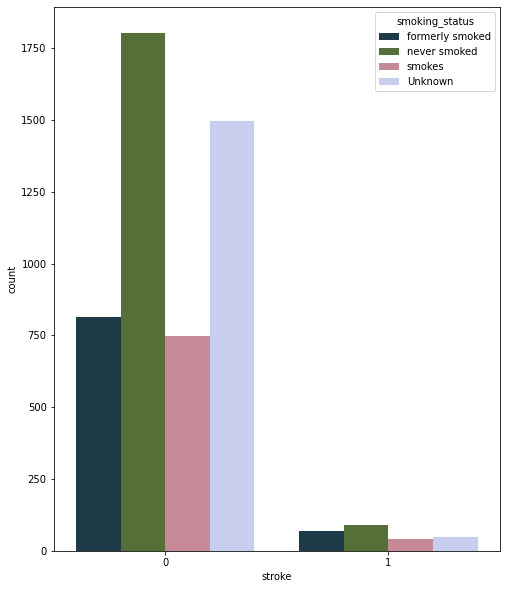

In [13]:
# Plotting 'Stroke' data using 'smoking_status' information
mlp.pyplot.figure(figsize=(8,10))
sns.countplot(data=df,hue='smoking_status',x='stroke',palette='cubehelix',orient='v')

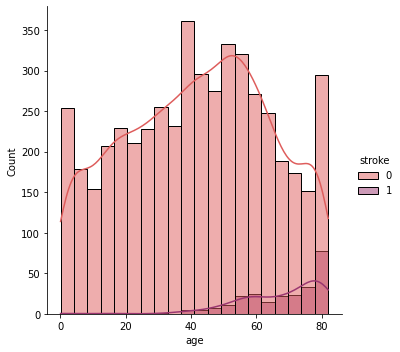

In [97]:
# Plotting age wise stroke data
sns.displot(data=df,hue='stroke',x='age',palette='flare',kde=True,legend=True)

In [12]:
# Encoding text data using LabelEncoder
le = LabelEncoder()
gender = le.fit_transform(df['gender'])
ever_married = le.fit_transform(df['ever_married'])
work_type = le.fit_transform(df['work_type'])
Residence_type = le.fit_transform(df['Residence_type'])
smoking_status = le.fit_transform(df['smoking_status'])

In [21]:
# Assigning encoded data to feature data frame
df['gender'] = gender
df['ever_married'] = ever_married
df['work_type'] = work_type
df['Residence_type'] = Residence_type
df['smoking_status'] = smoking_status

In [23]:
df[df['work_type']==4].shape

(687, 11)

In [27]:
# filling null data with average of total values
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [28]:
# Preview after encoding
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [32]:
# Assigning X and y from data frame
X = df.drop('stroke',axis=1)
y = df['stroke']

In [33]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [34]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [37]:
# Splitting Train and Test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.16,random_state=43)

In [49]:
# training using ML algos
log_reg = SGDClassifier(loss = 'hinge',penalty='l1',verbose=3,shuffle=True)
log_reg.fit(X_train,y_train)

-- Epoch 1
Norm: 2596.43, NNZs: 10, Bias: -169.019763, T: 4292, Avg. loss: 4397.570492
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1679.62, NNZs: 10, Bias: -180.554960, T: 8584, Avg. loss: 1953.871883
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1263.52, NNZs: 10, Bias: -185.559665, T: 12876, Avg. loss: 1171.273032
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1124.99, NNZs: 10, Bias: -193.300696, T: 17168, Avg. loss: 733.604379
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1112.55, NNZs: 10, Bias: -201.654255, T: 21460, Avg. loss: 551.883712
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1139.58, NNZs: 10, Bias: -209.256253, T: 25752, Avg. loss: 448.767966
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1155.29, NNZs: 10, Bias: -213.246855, T: 30044, Avg. loss: 369.226706
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1184.19, NNZs: 10, Bias: -219.279219, T: 34336, Avg. loss: 291.992388
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1192.1

SGDClassifier(penalty='l1', verbose=3)

In [51]:
# Testing ML model
log_reg.predict(X_test)
print("Accuracy:",log_reg.score(X_test,y_test))

Accuracy: 0.9486552567237164
